In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Distribution: gamma;  KS: 0.014326195853286094; p-value: 0.9846676854778378 - Parameters: (np.float64(2270.153157288206), np.float64(-91.14133511677426), np.float64(0.04231594877378131))
Distribution: beta;  KS: 0.015353883281008396; p-value: 0.9696013167131392 - Parameters: (np.float64(60.352545532442704), np.float64(76.38988411019062), np.float64(-16.110304909629757), np.float64(47.65427889254376))
Distribution: norm;  KS: 0.015595421572019208; p-value: 0.9650163340896128 - Parameters: (np.float64(4.922352324845585), np.float64(2.016177607814006))
Distribution: lognorm;  KS: 0.01580536316908404; p-value: 0.9606904872852859 - Parameters: (np.float64(0.022667530577576755), np.float64(-84.07317226546004), np.float64(88.9708657581144))
Distribution: expon;  KS: 0.3392505757989279; p-value: 3.3781913008354433e-103 - Parameters: (-1.1342651465110505, 6.056617471356636)
Best fit: gamma
Parameters: (np.float64(2270.153157288206), np.float64(-91.14133511677426), np.float64(0.04231594877378131

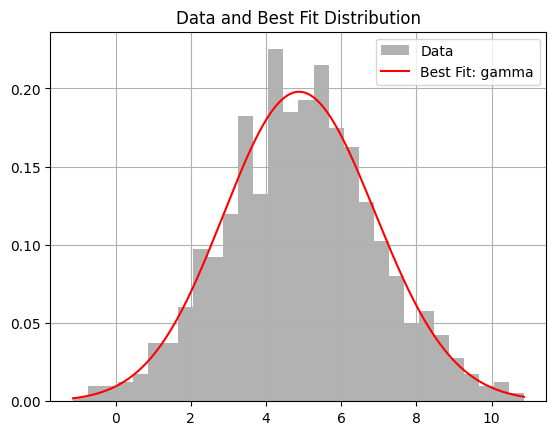

In [14]:
# Fitting a dataset from CSV to various probability distributions


# --- Step 1: Load Data from CSV ---
# Replace 'data.csv' and 'column_name' with your actual file and column name
csv_file = 'data_0.csv'

df = pd.read_csv(csv_file, header=None)
data = df[0].dropna().values  # Drop missing values if any
# Candidate distributions to check
distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta']

# Store results
results = []

# Fit each distribution and calculate the Kolmogorov–Smirnov statistic
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    D, p = stats.kstest(data, dist_name, args=params)
    results.append((dist_name, params, D, p))

# Sort results by KS statistic (lower is better)
results.sort(key=lambda x: x[2])
for result in results:
    print(f"Distribution: {result[0]};  KS: {result[2]}; p-value: {result[3]} - Parameters: {result[1]}")
# Show top result
best_dist_name, best_params, best_D, best_p = results[0]
print(f"Best fit: {best_dist_name}")
print(f"Parameters: {best_params}")
print(f"KS Statistic: {best_D:.4f}, p-value: {best_p:.4f}")

# Plot the histogram and best-fit PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Data')

x = np.linspace(min(data), max(data), 1000)
pdf = getattr(stats, best_dist_name).pdf(x, *best_params)
plt.plot(x, pdf, 'r-', label=f'Best Fit: {best_dist_name}')

plt.title("Data and Best Fit Distribution")
plt.legend()
plt.grid(True)
plt.show()